## Importing Libraries

In [1]:
import torch
import torch.nn as nn

In [2]:
# Device agnostic code
device = 'mps' if torch.backends.mps.is_available() else 'cpu'
device

'mps'

## Get Data

The Dataset is subset of the Food101 dataset
Food101 starts 101 different classes of food and 1000 images per class(750 training, 250 testing)

The subset I created that consists of 3 classes of food and only 10% of the images(~75 training, 25 testing)

It's important to try things on a small scale and then increase the scale when necessary. 

In [5]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist download it and prepare it
if image_path.is_dir():
    print(f"{image_path} directory already exists..... skipping download")

else:
    print(f"{image_path} does not exist, creating one....")
    image_path.mkdir(parents=True,exist_ok=True)

    # Download pizza, steak and sushi data
with open(data_path/"pizza_steak_sushi.zip","wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak, sushi data....")
    f.write(request.content)

# Unzip pizza steak sushi zip file 
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip","r") as zip_ref:
    print("Unzipping pizza, steak and sushi data....")
    zip_ref.extractall(image_path)
    

data/pizza_steak_sushi directory already exists..... skipping download
Unzipping pizza, steak and sushi data....


In [10]:
# so now I can download everything
# first create the directory
# first create the outer file
# then the inner file
# then set mkdir
# with open(pathname/desired file where we want to download, wb) as f: wb--> write binary, f--> file
# request = request.get("the file we want to download")
# now convert the download file into that converted file
# f.write(request.content)


In [11]:
image_path

PosixPath('data/pizza_steak_sushi')

## Data Preparation and Exploration

In [14]:
import os
def walk_through_dir(dir_path):
    """Walks through dir_path returning its content"""
    for dirpath,dirnames,filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [15]:
walk_through_dir(image_path)

There are 2 directories and 1 images in 'data/pizza_steak_sushi'.
There are 3 directories and 1 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.


In [16]:
train_dir = image_path/'train'
test_dir = image_path/'test'

In [17]:
 train_dir,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### Visualizing image

1. Get all the image paths.
2. pick a random image path using Python's random.choice()
3. Get the image class name using `pathlib.Path.parent.stem`
4. For image we should open the image with Python's PIL
5. After that, show the image and print metadata 

Random image path: data/pizza_steak_sushi/train/pizza/3269634.jpg
Random image class: pizza
Image height:512
Image width: 512


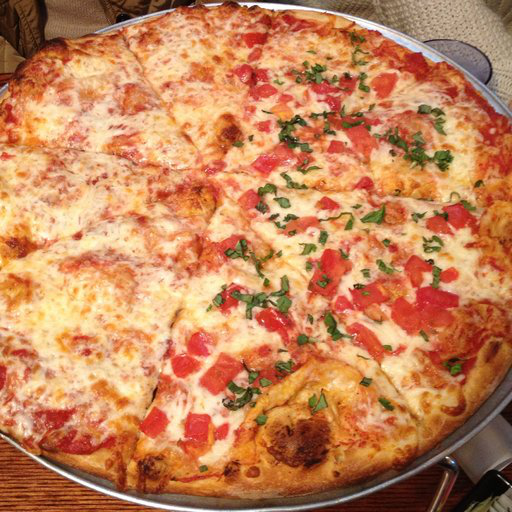

In [55]:
import random
from PIL import Image

# Set seed
#random.seed(42)

# 1. Get all the image path
image_path_list = list(image_path.glob("*/*/*.jpg"))

image_path_list

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)
#print(random_image_path)

# 3. Get image class from path name (the image class is the name of the directory where theimage is stored)
image_class = random_image_path.parent.stem # parent indicates the name of the folder and stem indicates the end part of the name of the folder
#print(image_class)

# 4. Open image
img = Image.open(random_image_path)

# 5. Print the data
print(f"Random image path: {random_image_path}")
print(f"Random image class: {image_class}")
print(f"Image height:{img.height}")
print(f"Image width: {img.width}")
img

(-0.5, 511.5, 383.5, -0.5)

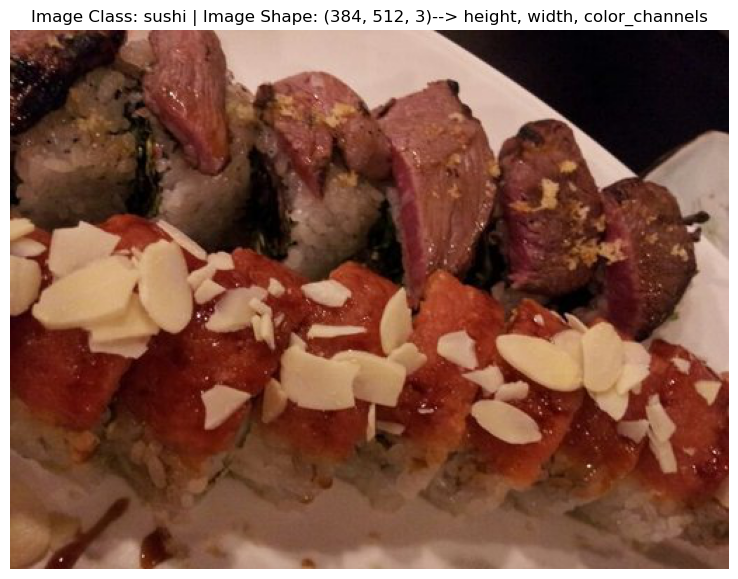

In [69]:
# Try to visualize image with matplotlib
import matplotlib.pyplot as plt
import numpy as np

# 1. Get the image path of all the images
image_path_list_mat = list(image_path.glob("*/*/*.jpg"))

# 2. randomly choose an image
random_image_path = random.choice(image_path_list_mat)

# 3. The class of the random image
random_image_class = random_image_path.parent.stem

# 4. Get the image
img = Image.open(random_image_path)

# 5. Turn the image into tensors
image_as_array = np.asarray(img)

# Plot the image
plt.figure(figsize = (10,7))

plt.imshow(image_as_array)
plt.title(f"Image Class: {random_image_class} | Image Shape: {image_as_array.shape}--> height, width, color_channels")
# If I don't turn the image into tensors I don't get the shape of the image file

plt.axis('off')

The *```color channel```* of the image is at `last`, which is default for matplotlib library and PIL library but PyTorch want the color channel of the image at `first`

In [70]:
image_as_array

array([[[143,  84,  68],
        [143,  85,  71],
        [148,  90,  76],
        ...,
        [ 44,  34,  33],
        [ 45,  33,  33],
        [ 42,  30,  30]],

       [[145,  86,  70],
        [142,  83,  69],
        [144,  86,  72],
        ...,
        [ 43,  33,  32],
        [ 45,  33,  33],
        [ 43,  31,  31]],

       [[150,  91,  75],
        [143,  84,  70],
        [135,  76,  62],
        ...,
        [ 38,  28,  29],
        [ 42,  32,  31],
        [ 43,  33,  32]],

       ...,

       [[137,  87,  50],
        [137,  87,  52],
        [139,  89,  54],
        ...,
        [124,  83,  65],
        [123,  82,  64],
        [123,  82,  64]],

       [[132,  82,  45],
        [131,  81,  46],
        [131,  81,  46],
        ...,
        [124,  83,  65],
        [123,  82,  64],
        [122,  81,  63]],

       [[126,  76,  39],
        [122,  72,  37],
        [120,  70,  35],
        ...,
        [124,  83,  65],
        [122,  81,  63],
        [121,  80,  62]]

## Transforming Data

Before we can use our image data with PyTorch

1. Turn our target data into tensors (in our case, numerical representation of image data)
2. Turn it into a `torch.utils.data.Dataset` and subsequently `torch.utils.data.Dataloader` 

In [71]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


### Transform data with torchvision.transforms

Turning jpegs into Tensors

Transform helps you get your images ready to be used with a model/perform data augmentation

In [80]:
# a transform for image
data_transform = transforms.Compose([
    # it takes a list

    # Resize our images to 64X64 because our  TinyVGG model takes the input image in this shape
    transforms.Resize(size = (64,64)),

    # Flip the images randomly on the horizontal 
    transforms.RandomHorizontalFlip(p=0.5), # that p indicates 50% of the time the image passes through the image, it got flip
    
    # convert the image into tensors
    transforms.ToTensor()
])

In [81]:
data_transform(img)

tensor([[[0.5686, 0.5843, 0.5412,  ..., 0.0392, 0.0353, 0.0824],
         [0.5804, 0.5490, 0.4863,  ..., 0.0392, 0.0392, 0.0431],
         [0.4824, 0.4431, 0.3922,  ..., 0.0471, 0.0431, 0.0392],
         ...,
         [0.5922, 0.5922, 0.5569,  ..., 0.4431, 0.4353, 0.4549],
         [0.5725, 0.5490, 0.4980,  ..., 0.4471, 0.4824, 0.4902],
         [0.5255, 0.4980, 0.5647,  ..., 0.3804, 0.4471, 0.4784]],

        [[0.3333, 0.3412, 0.2980,  ..., 0.0196, 0.0157, 0.0510],
         [0.3333, 0.2980, 0.2588,  ..., 0.0157, 0.0196, 0.0196],
         [0.2706, 0.2235, 0.1961,  ..., 0.0196, 0.0196, 0.0196],
         ...,
         [0.3843, 0.3882, 0.3608,  ..., 0.2824, 0.2667, 0.2745],
         [0.3647, 0.3451, 0.3098,  ..., 0.2902, 0.3216, 0.3176],
         [0.3216, 0.2980, 0.3804,  ..., 0.2314, 0.2941, 0.3216]],

        [[0.2863, 0.2863, 0.2353,  ..., 0.0471, 0.0353, 0.0588],
         [0.2824, 0.2392, 0.1882,  ..., 0.0471, 0.0392, 0.0353],
         [0.2196, 0.1608, 0.1412,  ..., 0.0471, 0.0471, 0.

In [82]:
data_transform(img).shape

torch.Size([3, 64, 64])

## Visualize transformed image

In [ ]:
def plot_transfromed_images(image_paths: list, transform,n =3, seed = None):
    """
    n : number of images we want to transform at a time

    Pipeline: 
    1. Randomly selected some image paths
    2. Then pass those images through the transfrom function
    3. Plot those images and compared the images with original ones.
    """
    if seed:
        random.seed(seed)
    randm_image_paths = random.sample(image_path,)